<a href="https://colab.research.google.com/github/vermilion000/Iris_Dataset_Classification/blob/main/Fake_Loans_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

LabelEncoder for converting Categorical Data into numbers
LogisticRegression for binary classification

In [ ]:
en = LabelEncoder()
scaler = MinMaxScaler()
classifier = LogisticRegression(max_iter = 400)

Unzipping data and loading

In [ ]:
zip_path = "/content/archive.zip"
try:
  with zipfile.ZipFile(zip_path,'r') as data_zip:
    filelist = data_zip.namelist()
    print(filelist)
    data_zip.extract(filelist[0],"/content/data_json")
except zipfile.BadZipFile:
  print(f"Error: {zip_path} is an invalid zip")
except FileNotFoundError:
  print(f"Error:{zip_path} is not Present")
except Exception as e:
  print(f"Error : {e} ")

['loan_approval_dataset.csv']


Analyzing data

In [ ]:
data  = pd.read_csv("/content/data_json/loan_approval_dataset.csv")
data_shape = data.shape
print(data_shape)
data_columns = data.columns
print(data_columns)
data_type = [[data[data_columns[i]].dtypes ,data_columns[i],int(data[data_columns[i]].isna().sum())] for i in range(len(data_columns))]
print(data_type)
data.describe()
data.head()

(4269, 13)
Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')
[[dtype('int64'), 'loan_id', 0], [dtype('int64'), ' no_of_dependents', 0], [dtype('O'), ' education', 0], [dtype('O'), ' self_employed', 0], [dtype('int64'), ' income_annum', 0], [dtype('int64'), ' loan_amount', 0], [dtype('int64'), ' loan_term', 0], [dtype('int64'), ' cibil_score', 0], [dtype('int64'), ' residential_assets_value', 0], [dtype('int64'), ' commercial_assets_value', 0], [dtype('int64'), ' luxury_assets_value', 0], [dtype('int64'), ' bank_asset_value', 0], [dtype('O'), ' loan_status', 0]]


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Preprocessing : Convert Categoriacal data

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
# data_en = data.select_dtypes(include=['object']).apply(en.fit_transform)
data_En = data[categorical_columns].apply(en.fit_transform)
data_En.head()
# data_new = data.drop(data.select_dtypes(include='Objects'))
data_new =  data
data_new[categorical_columns] = data_En
data_new.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


preprocessing : Scaling and spliting data into train and test datum

In [ ]:
scaler.fit_transform(data_new)
y = data_new[' loan_status']
x = data_new.drop(' loan_status',axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y)

Training and Prediction for validation

In [ ]:
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)


Plots Confusion Matrix

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       668
           1       0.78      0.64      0.70       400

    accuracy                           0.80      1068
   macro avg       0.79      0.76      0.77      1068
weighted avg       0.79      0.80      0.79      1068



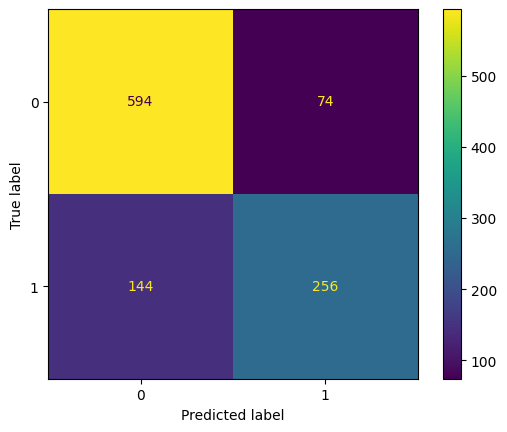

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))